In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

%matplotlib inline is a magic command in Jupyter Notebook, a popular interactive computing environment for Python. When you run this command in a Jupyter Notebook cell, it sets up the environment to display Matplotlib plots directly within the notebook, rather than in separate windows or external interfaces. Here's what it does and why it's used:

Displaying Plots Inline: The primary purpose of %matplotlib inline is to ensure that any Matplotlib plots created in the notebook will be displayed directly below the code cell that generates them. This inline display allows you to see the visualizations right in the notebook interface, making it easier to integrate code and visual results.

Seamless Integration: Without %matplotlib inline, Matplotlib plots may open in separate windows or external graphical interfaces. This can be less convenient and disrupt the flow of your analysis, especially in interactive environments like Jupyter Notebook, where you want to document and explain your code alongside its output.

Documentation and Sharing: When you're creating Jupyter Notebook documents for analysis, data exploration, or reporting, it's essential to have visualizations embedded within the document. %matplotlib inline makes it easier to share your work, as others can view your notebook with plots included without needing to run separate code.





In [ ]:
#Import Google Drive Folder
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Read Dataset and check the head part
companies = pd.read_csv('/content/drive/MyDrive/dataset/1000_Companies.csv')
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# We have 4 columns here. The first 3 is about independent varialbe (x) and the last one is dependent variable which is as (y). So at first we have to saperate x and y.

In [ ]:
#Define dependent and independent variable

X = companies.iloc[: ,:-4].values
y = companies.iloc[:,4].values
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


We successfully define x and y. In x--> [:, :-4] is used to select all rows (denoted by :) and all columns except for the last four columns (denoted by :-4). The :-4 slice notation means that you are excluding the last four columns of the DataFrame.

iloc is a method used to select specific rows and columns from the DataFrame based on their integer position (index).

<ipython-input-68-13b7e299f59d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(companies.corr())


<Axes: >

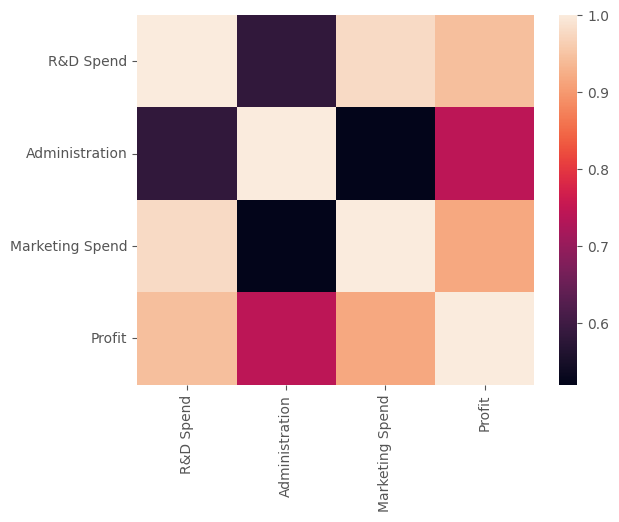

In [ ]:
#Data Visualizatiobn
#Building the corelatio Matrix
sns.heatmap(companies.corr())

Seaborn is built on top of Matplotlib and is designed to work seamlessly with it. While you can use Seaborn without explicitly importing Matplotlib, Matplotlib is still a foundational library for creating plots and figures in Python. Seaborn is more specialized for statistical data visualization and provides a high-level interface for creating aesthetically pleasing and informative statistical graphics.

<ipython-input-69-8595dc3c880e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = companies.corr()


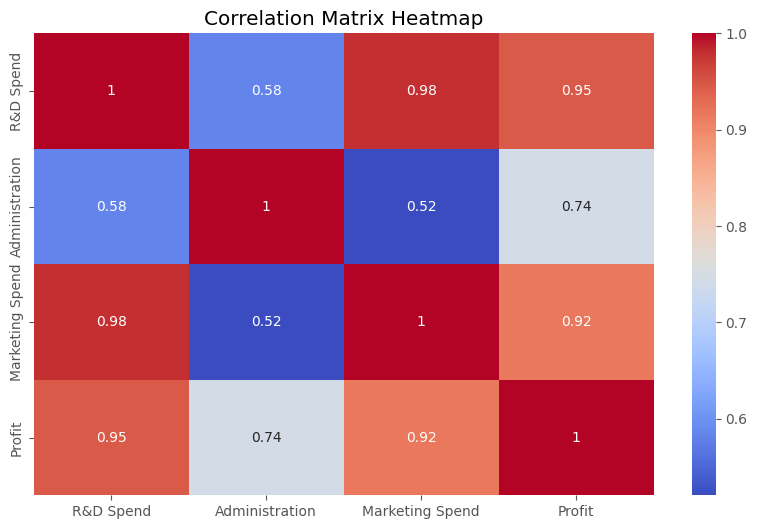

In [ ]:
#Heatmap & correlation matrix
plt.figure(figsize=(10, 6))
corr_matrix = companies.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


In [ ]:
#Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
companies['State'] = labelencoder.fit_transform(companies['State'])
X = companies
X

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.800,471784.1000,2,192261.83000
1,162597.70,151377.590,443898.5300,0,191792.06000
2,153441.51,101145.550,407934.5400,1,191050.39000
3,144372.41,118671.850,383199.6200,2,182901.99000
4,142107.34,91391.770,366168.4200,1,166187.94000
...,...,...,...,...,...
995,54135.00,118451.999,173232.6695,0,95279.96251
996,134970.00,130390.080,329204.0228,0,164336.60550
997,100275.47,241926.310,227142.8200,0,413956.48000
998,128456.23,321652.140,281692.3200,0,333962.19000


or we also cando:

X[:, 3] = labelencoder.fit_transform(X[:, 3])


onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()
print(X)

In [ ]:
X = X.iloc[:, 1:]  # Select all rows and columns from the second column (index 1) onwards


In [ ]:
#Spliting train and test data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state=0)

In [ ]:
#Filtering with multiple linear regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
#Predicting Linear Regression
y_pred = reg.predict(X_test)
y_pred

array([ 89012.02672,  87654.55773,  94093.35179, 175396.2616 ,
        83356.61784, 110395.794  , 105008.31   ,  90687.2921 ,
       164180.2702 ,  53483.75718,  66273.3533 , 150393.716  ,
       125971.2343 ,  58694.93455, 176344.525  ,  75297.23305,
       118219.3944 , 163462.6654 , 132602.65   , 181574.4968 ,
        97483.56   ,  84909.71956, 180684.3252 ,  83391.64379,
       104159.467  , 100404.0021 ,  64926.08   ,  56944.49153,
        68210.88613, 191792.06   , 120738.6997 , 110848.5685 ,
       101352.2656 , 137842.4672 ,  63306.39937, 107994.381  ,
       185502.5285 , 171176.9165 , 174364.2776 , 117645.3106 ,
        96616.9285 , 164336.6055 , 106865.8621 ,  50468.96294,
       116492.8715 ,  57992.70704, 158208.7735 ,  78689.62408,
       159514.1307 , 131051.7051 , 184555.1194 , 174329.2516 ,
        92949.45565,  78308.61013, 180257.1795 ,  84583.38025,
       142762.3312 , 170174.8327 ,  84305.73556, 105154.7165 ,
       141527.0259 ,  52609.81711, 140832.487  , 138872

In [ ]:
#Calculating co-efficient
print(reg.coef_)

[-4.92804863e-16  5.55111512e-16  4.43111909e-12  1.00000000e+00]


In [ ]:
#Calculating Intercept
print(reg.intercept_)

2.9103830456733704e-11


In [ ]:
#Calculating R Squered value
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

1.0